# Descriptive Statistics - Fandango reviews

This project is based of FiveThirtyEight's exploration of suspicious high ratings given by Fandango. The article can be found [here](http://fivethirtyeight.com/features/fandango-movies-ratings/)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

movie_reviews = pd.read_table("http://bit.ly/fandango_score", sep=',')
movie_reviews.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


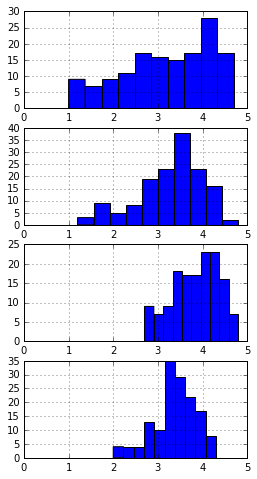

In [15]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.set_xlim(0,5.0)
ax2.set_xlim(0,5.0)
ax3.set_xlim(0,5.0)
ax4.set_xlim(0,5.0)

movie_reviews["RT_user_norm"].hist(ax=ax1)
movie_reviews["Metacritic_user_nom"].hist(ax=ax2)
movie_reviews["Fandango_Ratingvalue"].hist(ax=ax3)
movie_reviews["IMDB_norm"].hist(ax=ax4)

As can be seen from above histogram, Fandango has consistenly high ratings for movies (between 3 and 5), while others resemble a nice **Normal Distribution curve**. 

In [16]:
def calc_mean(series):
    vals = series.values
    return sum(vals) / len(vals)
    
user_reviews = movie_reviews[["RT_user_norm", "Metacritic_user_nom", "Fandango_Ratingvalue", "IMDB_norm"]]
user_reviews_mean = user_reviews.apply(calc_mean)

rt_mean = user_reviews_mean.RT_user_norm
mc_mean = user_reviews_mean.Metacritic_user_nom
fg_mean = user_reviews_mean.Fandango_Ratingvalue
id_mean = user_reviews_mean.IMDB_norm

print("Rotten Tomatoes (mean):", rt_mean)
print("Metacritic (mean):", mc_mean)
print("Fandango (mean):",fg_mean)
print("IMDB (mean):",id_mean)

Rotten Tomatoes (mean): 3.19383561644
Metacritic (mean): 3.2595890411
Fandango (mean): 3.84520547945
IMDB (mean): 3.36849315068


Looking at mean values confirms initial analysis as Fandango's value is much higher than critic review aggregating sites.

### Calculate variance and standard deviation

In [17]:
def calc_variance(series):
    mean = calc_mean(series)
    variances = (series - mean) ** 2
    return calc_mean(variances)
    
columns = ["RT_user_norm", "Metacritic_user_nom", "Fandango_Ratingvalue", "IMDB_norm"]
user_reviews = movie_reviews[columns]
user_reviews_variances = user_reviews.apply(calc_variance)

rt_var = user_reviews_variances.RT_user_norm
mc_var = user_reviews_variances.Metacritic_user_nom
fg_var = user_reviews_variances.Fandango_Ratingvalue
id_var = user_reviews_variances.IMDB_norm

rt_stdev = rt_var ** (1/2)
mc_stdev = mc_var ** (1/2)
fg_stdev = fg_var ** (1/2)
id_stdev = id_var ** (1/2)

print("Rotten Tomatoes (variance):", rt_var)
print("Metacritic (variance):", mc_var)
print("Fandango (variance):", fg_var)
print("IMDB (variance):", id_var)

print("Rotten Tomatoes (standard deviation):", rt_stdev)
print("Metacritic (standard deviation):", mc_stdev)
print("Fandango (standard deviation):", fg_stdev)
print("IMDB (standard deviation):", id_stdev)

Rotten Tomatoes (variance): 0.995578438731
Metacritic (variance): 0.566654625633
Fandango (variance): 0.251107149559
IMDB (variance): 0.228219647213
Rotten Tomatoes (standard deviation): 0.997786770173
Metacritic (standard deviation): 0.752764654878
Fandango (standard deviation): 0.501105926486
IMDB (standard deviation): 0.47772340032


All the above values matches with the histogram plot. **Rotten Tomatoes** and **Metacritic** have spread out values **(high variance)** with mean around 3, while **Fandango** has low spread **(low variance)** and higher mean.

** Let's generate scatter plot comparing Fandago's values to that of others. **

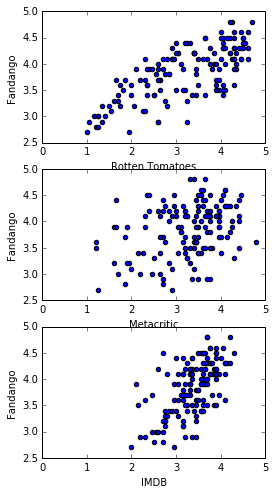

In [18]:
fig = plt.figure(figsize=(4,8))

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.set(xlabel="Rotten Tomatoes", ylabel="Fandango", xlim=(0,5.0))
ax2.set(xlabel="Metacritic", ylabel="Fandango", xlim=(0,5.0))
ax3.set(xlabel="IMDB", ylabel="Fandango", xlim=(0,5.0))

ax1.scatter(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])
ax2.scatter(movie_reviews["Metacritic_user_nom"], movie_reviews["Fandango_Ratingvalue"])
ax3.scatter(movie_reviews["IMDB_norm"], movie_reviews["Fandango_Ratingvalue"])
    
plt.show()

From the above plots, it seems like RT and IMDB corelates most with Fandango values.

### Calculating Covariance

In [19]:
def calc_covariance(series_one, series_two):
    x = series_one.values
    y = series_two.values
    x_mean = calc_mean(series_one)
    y_mean = calc_mean(series_two)
    x_diffs = [i - x_mean for i in x]
    y_diffs = [i - y_mean for i in y]
    codeviates = [x_diffs[i] * y_diffs[i] for i in range(len(x))]
    return sum(codeviates) / len(codeviates)

rt_fg_covar = calc_covariance(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])
mc_fg_covar = calc_covariance(movie_reviews["Metacritic_user_nom"], movie_reviews["Fandango_Ratingvalue"])
id_fg_covar = calc_covariance(movie_reviews["IMDB_norm"], movie_reviews["Fandango_Ratingvalue"])

print("Covariance between Rotten Tomatoes and Fandango:", rt_fg_covar)
print("Covariance between Metacritic and Fandango", mc_fg_covar)
print("Covariance between IMDB and Fandango", id_fg_covar)

Covariance between Rotten Tomatoes and Fandango: 0.362162225558
Covariance between Metacritic and Fandango 0.127100769375
Covariance between IMDB and Fandango 0.143718802777


Rotten Tomatoes covaries strongly with Fandango **(0.36)** compared to Metacritic **(0.13)** and IMDB **(0.14)**.

### Calculating Correlation

In [21]:
def calc_correlation(s1, s2):
    cov = calc_covariance(s1, s2)
    return cov / ((calc_variance(s1) ** (1/2)) * (calc_variance(s2) ** (1/2)))
    
rt_fg_corr = calc_correlation(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])
mc_fg_corr = calc_correlation(movie_reviews["Metacritic_user_nom"], movie_reviews["Fandango_Ratingvalue"])
id_fg_corr = calc_correlation(movie_reviews["IMDB_norm"], movie_reviews["Fandango_Ratingvalue"])

print("Correlation between Rotten Tomatoes and Fandango", rt_fg_corr)
print("Correlation between Metacritic and Fandango", mc_fg_corr)
print("Correlation between IMDB and Fandango", id_fg_corr)

Correlation between Rotten Tomatoes and Fandango 0.724328994249
Correlation between Metacritic and Fandango 0.336945314265
Correlation between IMDB and Fandango 0.600354177263


** This confirms with the scatter plot observations that Rotten Tomatoes and IMDB correlate the strongest with Fandango, with correlation values of 0.72 and 0.60 respectively. Metacritic, on the other hand, only has a correlation value of 0.34 with Fandango. **